In [3]:
import numpy as np
import pandas as pd
import os
import sys
import time as time
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src')
import utility

import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.classification.hybrid import HIVECOTEV1

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sktime.classification.shapelet_based import ROCKETClassifier

from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 7, weight = 1000)
color_map = ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
class_names = ['crackle', 'no-crackle']

In [4]:
X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_no_rms.ts')
X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['0' '1'] [3261 1737]


In [2]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_3000_same_ESSUA.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_3000_same_AUTH.ts')
X_train, y_train  = shuffle(X_train, y_train , random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)
labels_test, counts_test = np.unique(y_test, return_counts=True)
print(labels_test, counts_test)

['0' '1'] [2316 4080]
['0' '1'] [ 54 448]


# ROCKET

In [5]:
start = time.time()
rocket = ROCKETClassifier(num_kernels=1000, random_state=0)
rocket.fit(X_train, y_train)
end = time.time()
print('train time: ', str(end - start))
start = time.time()
rocket_y_pred = rocket.predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != rocket_y_pred).sum()}')
print(classification_report(rocket_y_pred, y_test))
end = time.time()
print('Predict time: ', str(end - start))

train time:  617.2095086574554
Number of mislabeled points out of a total 1667 points : 475
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1381
           1       0.34      0.69      0.45       286

    accuracy                           0.72      1667
   macro avg       0.63      0.70      0.63      1667
weighted avg       0.82      0.72      0.75      1667

Predict time:  203.25891780853271


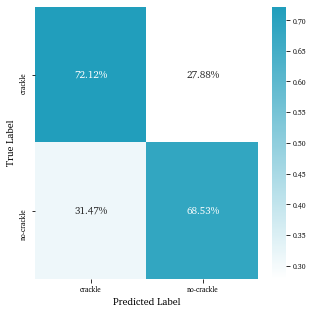

In [6]:
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 7, weight = 1000)
color_map = ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
class_names = ['crackle', 'no-crackle']

cm = confusion_matrix(rocket_y_pred, y_test)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[1]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)

# Testing ROCKET transform with a different classifier

In [4]:
from sktime.transformations.panel.rocket import Rocket
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()


X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_no_rms.ts')
X, y = shuffle(X, y, random_state=0)
rocket = Rocket()  
start = time.time()
rocket.fit(X)
X_transformed = rocket.transform(X)
print(f'Transform time: {time.time() - start}')

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)

Transform time: 8128.459788560867


In [6]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
2625,0.57095,6.751647,0.434768,7.077558,0.545162,13.090509,0.67895,9.042610,0.64015,3.765869,...,0.599226,14.205358,0.449081,12.068522,0.61590,15.204057,0.554998,5.757785,0.586170,21.072318
3360,0.75610,11.881089,0.413246,11.202988,0.577317,11.603873,0.75770,9.149691,0.80955,5.777520,...,0.774936,19.849525,0.243718,14.341312,0.75340,17.619864,0.756142,10.794957,0.757841,16.823556
1996,0.86545,23.991335,0.249733,19.985633,0.598363,27.040235,0.86490,17.897306,0.89020,14.502124,...,0.875606,41.895464,0.128141,47.991651,0.88215,29.019119,0.853956,19.519775,0.874859,32.398565
1736,0.62980,16.112492,0.441431,9.016496,0.586524,11.938853,0.68310,12.131062,0.64505,9.673374,...,0.629603,27.996961,0.387589,11.030768,0.63640,16.273979,0.605284,12.319452,0.647558,17.833334
2368,0.73540,4.273983,0.442098,7.487020,0.578047,9.898212,0.74925,7.643889,0.80445,1.520278,...,0.731305,16.149735,0.290041,9.111875,0.72255,21.582713,0.751529,2.239194,0.725193,18.148363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,0.74880,5.380729,0.433302,7.606802,0.502485,11.457151,0.73230,8.750378,0.80935,2.946781,...,0.720474,15.827342,0.291369,9.575688,0.72400,17.958222,0.734283,3.382913,0.738252,11.027915
1988,0.61530,9.003181,0.442631,6.709935,0.597925,9.044421,0.68285,9.300254,0.65230,7.201444,...,0.626405,20.624315,0.407048,10.054431,0.64245,16.326043,0.600271,9.991771,0.636247,15.058326
6034,0.85575,15.415937,0.320496,14.136888,0.546624,25.485496,0.78565,12.579878,0.87645,9.602946,...,0.850954,31.454376,0.157559,23.210515,0.82195,26.238172,0.850948,14.481646,0.842468,17.621079
4259,0.72595,8.333320,0.457689,6.373677,0.565332,9.226250,0.73405,6.124778,0.80875,4.290089,...,0.639350,17.139669,0.338407,11.125352,0.65575,17.982104,0.690264,7.379106,0.677121,12.337860


In [6]:
from sklearn.linear_model import RidgeClassifierCV

start = time.time()
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(X_train_transform, y_train)
print(f'Training time  : {time.time() - start}')

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [9]:
X_test_transform.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.035667,10.784041,0.00,-0.626855,1.000000,27.401126,0.056333,12.312379,0.9496,2.935943,...,0.029930,4.227192,0.015152,6.796651,0.475,0.755406,0.929876,0.269574,0.968000,16.519094
1,0.292667,5.907922,0.75,5.452541,0.488034,8.320895,0.335667,5.599276,0.5992,6.523843,...,0.274208,6.834840,0.250176,5.456066,0.725,1.845743,0.536515,11.106506,0.672333,6.538390
2,0.203667,10.597445,0.70,2.667654,0.441880,14.632096,0.240333,9.020471,0.7220,6.622461,...,0.191021,9.897286,0.181113,9.636991,1.000,2.266826,0.671784,22.266239,0.759333,13.397994
3,0.137000,4.424781,0.00,-3.555574,0.640171,10.864948,0.179667,5.313892,0.8016,6.197876,...,0.098592,7.246622,0.100775,6.482497,0.325,0.849922,0.787137,11.693292,0.851333,6.329436
4,0.239333,6.452709,0.70,3.148407,0.416239,9.547368,0.278333,8.020110,0.6584,7.183100,...,0.188820,6.377173,0.196970,12.760646,1.000,2.595442,0.645228,11.412102,0.728333,9.341413


In [10]:
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


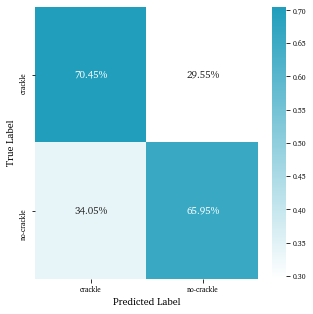

In [9]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)



cm = confusion_matrix(y_pred, y_test)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[1]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)

In [1]:
k = 200

X_train_pca = PCA(n_components = k).fit_transform(X_train)
X_test_pca = PCA(n_components = k).fit_transform(X_test)
clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)


y_pred = clf.predict(X_test_pca)



cm = confusion_matrix(y_pred, y_test)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[1]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)

NameError: name 'PCA' is not defined